Calculating Effort and Unusual Mortality Events

BeachCOMBERS data is housed on the OceanView ERDDAP maintained by Lynn deWitt at NOAA SWFSC:
https://oceanview.pfeg.noaa.gov/erddap/tabledap/EB_MM_BC.html

There are a few peculiarities with the data that are addressed below, mostly in mapping the names of different beaches, which is not always been consistent.

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from datetime import datetime
from matplotlib import dates as mdates
import seaborn as sns
from erddapy import ERDDAP

In [2]:
northern_beaches = geopandas.read_file('./data/BeachCOMBERS_Beach_Segments/North.geojson')
core_beaches = northern_beaches.iloc[[5,6,7,8,9,10,11,12,13,15,16,17]]

default_location = (36.8, -121.75)
default_zoom_start = 9
base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
# folium.GeoJson(northern_beaches).add_to(base_map)
beach = folium.GeoJson(northern_beaches.query('Name == "Beach 1(New Brighton)"')).add_to(base_map)
# folium.Vega(json_01, height=350, width=650).add_to(beach_popup)
for row in core_beaches.iterrows():
    gj = folium.GeoJson(row[1]['geometry']).add_to(base_map)
    gj.add_child(folium.Popup(row[1]['Name']))
    gj.add_to(base_map)

base_map

In [3]:
## If using the local file
df = pd.read_csv('./data/EB_MM_dd3e_6a9c_d6c0.csv', skiprows=[1]) # local file

## Access using erddapy (erddapy rest wrapper)
# e = ERDDAP(
#   server='https://oceanview.pfeg.noaa.gov/erddap',
#   protocol='tabledap',
# )
# e.dataset_id = 'EB_MM_BC'
# e.response = 'csv'
# df = e.to_pandas(skiprows=[1]) #createa pandas datafram from the CSV file

df['dateTime'] = pd.to_datetime(df['time'])
df.index = df['dateTime']

### Cleanup beach information

There were some inconsistencies with the beach names that have to mapped

In [4]:
df.tail()

,time,latitude,longitude,organization_code,beach_segment_code,percent_of_beach_surveyed,carcass_present,unique_survey_identifier,unique_carcass_identifier,species_sci_name,...,beach_segment_name,beach_length,north_latitude,north_longitude,south_latitude,south_longitude,datum,deposition_rate,notes,dateTime
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00+00:00,2019-05-01T00:00:00Z,37.08839,-122.27525,BC,11N,NaN,1,BC_2019_05_11N,119768,Fulmarus glacialis,...,Waddell,2.6,37.098167,-122.28195,37.078846,-122.26718,NaN,NaN,NaN,2019-05-01 00:00:00+00:00
2019-05-01 00:00:00+00:00,2019-05-01T00:00:00Z,37.08839,-122.27525,BC,11N,NaN,1,BC_2019_05_11N,119769,Larus occidentalis,...,Waddell,2.6,37.098167,-122.28195,37.078846,-122.26718,NaN,NaN,NaN,2019-05-01 00:00:00+00:00
2019-05-01 00:00:00+00:00,2019-05-01T00:00:00Z,37.08839,-122.27525,BC,11N,NaN,1,BC_2019_05_11N,119770,Larus occidentalis,...,Waddell,2.6,37.098167,-122.28195,37.078846,-122.26718,NaN,NaN,NaN,2019-05-01 00:00:00+00:00
2019-05-01 00:00:00+00:00,2019-05-01T00:00:00Z,35.75288,-121.31614,BC,17,NaN,1,BC_2019_05_17,119771,NaN,...,San Carpoforo,0.9,35.756767,-121.31962,35.748386,-121.31653,NaN,NaN,"Probably a yellow-rumped warbler, possibly dro...",2019-05-01 00:00:00+00:00
2019-05-01 00:00:00+00:00,2019-05-01T00:00:00Z,35.75288,-121.31614,BC,17,NaN,1,BC_2019_05_17,119772,Uria aalgae,...,San Carpoforo,0.9,35.756767,-121.31962,35.748386,-121.31653,NaN,NaN,skeleton and wings,2019-05-01 00:00:00+00:00


In [5]:
for i in range(1,10):
    df['beach_segment_code'].replace(to_replace=str(i),value='0'+str(i),inplace=True )
df['beach_segment_code'].replace(to_replace=['05A','05B'],value='05',inplace=True )
df['beach_segment_code'].replace(to_replace=['08A','08B'],value='08',inplace=True )
df['beach_segment_code'].replace(to_replace=['10C','10D',"10AB"],value='10',inplace=True )

The 10 year and 20 year reports focused on the "Core Beaches" which are beach 01-10, so that subset is selected here.

In [6]:
core_beaches = df[df['beach_segment_code'].isin(['01', '02', '03', '04', '05', '06', '07', '08', '09','10'])]
core_birds = core_beaches[(core_beaches['bird_or_mammal'] != 'mammal')] # THis includes surveys with no carcasses

### Calculating __Deposition Rate__ as Carcasses per Kilometer of Beach Surveyed per Month ###
### Only look at Common Murres

In [7]:
murres = core_birds.query("species_common_name == 'Common Murre'")

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:407: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:415: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


Now, effort has to estimated for each beach for each month. Since each survey has unique identifyer, those survey ids can be aggreated and counted as a timeseries for each beach. __Unfortuntely, effort is not always uniform from beach to beach nor through time.__

Text(0, 0.5, '# of Surveys')

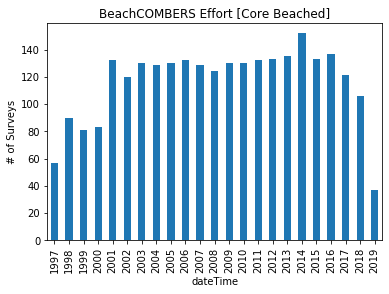

In [8]:
surveys = core_beaches.groupby(core_beaches['unique_survey_identifier']).first()
surveys.index = surveys['dateTime']
survey_counts = surveys.groupby(surveys.index.year).count()['time']
ax = survey_counts.plot(kind='bar')
ax.set_title('BeachCOMBERS Effort [Core Beached]')
ax.set_ylabel('# of Surveys')

Text(0, 0.5, '# of Carcasses')

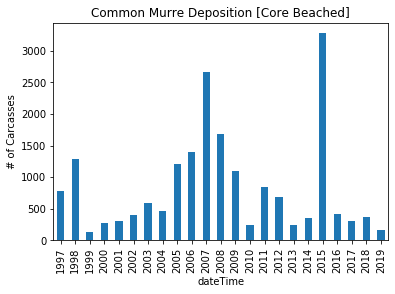

In [9]:
# Carcass Couytns
annual_bird_sums = murres.groupby(murres.index.year).sum()['carcass_present']
ax = annual_bird_sums.plot(kind='bar')
ax.set_title('Common Murre Deposition [Core Beached]')
ax.set_ylabel('# of Carcasses')

__Calculating Deposition__

Need to sum monthly carcass counts and divide by the number of monthly samples

//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:2180: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


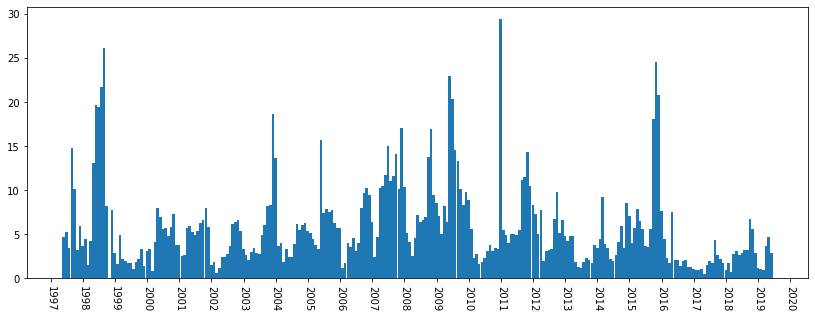

In [10]:
fig, (ax)= plt.subplots()
fig.set_size_inches(14,5)

total_length = core_beaches.groupby([pd.Grouper(freq="M"),'unique_survey_identifier']).first()['beach_length'].sum(level='dateTime')
bird_counts = core_beaches.groupby(pd.Grouper(freq="M"))['carcass_present'].sum()
depo = bird_counts/total_length
depo = depo.reset_index()
depo = depo.rename(columns = {0:'counts'})

ax.bar(x=depo['dateTime'],height=depo['counts'],width=1)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=-90);

__Roll up surveys into monthly states per beach__

1. Count the number of surveys per beach per month
2. Count the number of carcasses per month per beach
3. Divide by the number of surveys per month (average birds per month)
4. Divide by the length of the beach (birds/km/month)
5. Rolling SD and/or annual SD or total mean (climatology)
6. UME == >2SD above mean

Issue: what does carcass_present mean for surveys where there are mammals but no seabirds. Need new column

In [11]:
# 1. Count the number of surveys per beach per month
unique_surveys = core_beaches.groupby([pd.Grouper(freq="M"), core_beaches['beach_segment_code']])['unique_survey_identifier'].unique()
unique_surveys = unique_surveys.apply(lambda x: int(np.shape(x)[0]))

In [12]:
# 2. Count the number of carcasses per month per beach
carcass_count = murres.groupby([pd.Grouper(freq="M"), murres['beach_segment_code']])['carcass_present'].count()
carcass_count.head()

dateTime                   beach_segment_code
1997-05-31 00:00:00+00:00  03                     3
                           04                     9
                           06                    16
                           07                    37
                           09                     5
Name: carcass_present, dtype: int64

In [13]:
# 3. Divide by the number of surveys per month (average birds per month)
birds_per_month = carcass_count/unique_surveys

In [14]:
# 4. Divide by the length of the beach (birds/km/month)
beach_length = core_beaches.groupby([pd.Grouper(freq="M"), core_beaches['beach_segment_code']])['beach_length'].first()
birds_per_km = birds_per_month/beach_length
birds_per_km.head()

dateTime                   beach_segment_code
1997-05-31 00:00:00+00:00  01                         NaN
                           02                         NaN
                           03                    0.582524
                           04                    1.698113
                           06                    2.962963
dtype: float64

In [15]:
beach_ids = ['01', '02', '03', '04', '05', '06', '07', '08', '09','10']

for i, beach_id in enumerate(beach_ids):
    if i == 0:
        beach_density = pd.DataFrame({'birds_per_km':birds_per_km.xs(beach_id, level='beach_segment_code', drop_level=True)})
        beach_density['date'] = beach_density.index.tz_localize(None).to_pydatetime()
        beach_density.index= beach_density['date']
        beach_density.rename(columns={'birds_per_km':beach_id}, inplace=True)
    else:
        temp_beach = pd.DataFrame({'birds_per_km':birds_per_km.xs(beach_id, level='beach_segment_code', drop_level=True)})
        temp_beach['date'] = temp_beach.index.tz_localize(None).to_pydatetime()
        temp_beach.index= temp_beach['date']
        beach_density[beach_id] = temp_beach['birds_per_km']

In [16]:
beach_density.head()

,01,date,02,03,04,05,06,07,08,09,10
date,,,,,,,,,,,
1997-05-31,NaN,1997-05-31,NaN,0.582524,1.698113,NaN,2.962963,7.184466,NaN,0.970874,NaN
1997-06-30,NaN,1997-06-30,NaN,0.582524,1.509434,NaN,2.962963,6.019417,NaN,0.776699,NaN
1997-07-31,NaN,1997-07-31,NaN,0.388350,0.754717,NaN,1.111111,3.883495,NaN,0.194175,NaN
1997-08-31,0.27027,1997-08-31,0.416667,1.165049,1.886792,NaN,17.407407,36.504854,NaN,6.796117,NaN
1997-09-30,NaN,1997-09-30,NaN,2.330097,3.207547,NaN,18.333333,11.262136,NaN,1.165049,NaN


(729025.0, 737060.0)

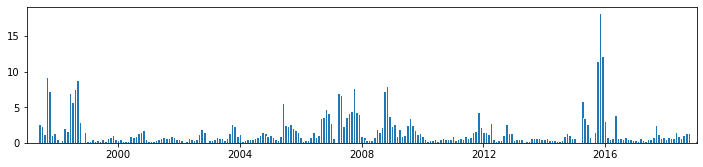

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12,2.5)

ax.bar(beach_density.index,beach_density.mean(axis=1),width=31,edgecolor='w')
# ax.plot(beach_density.index,beach_density['06'])
ax.set_xlim('19970101','20190101')

(729115.0, 736695.0)

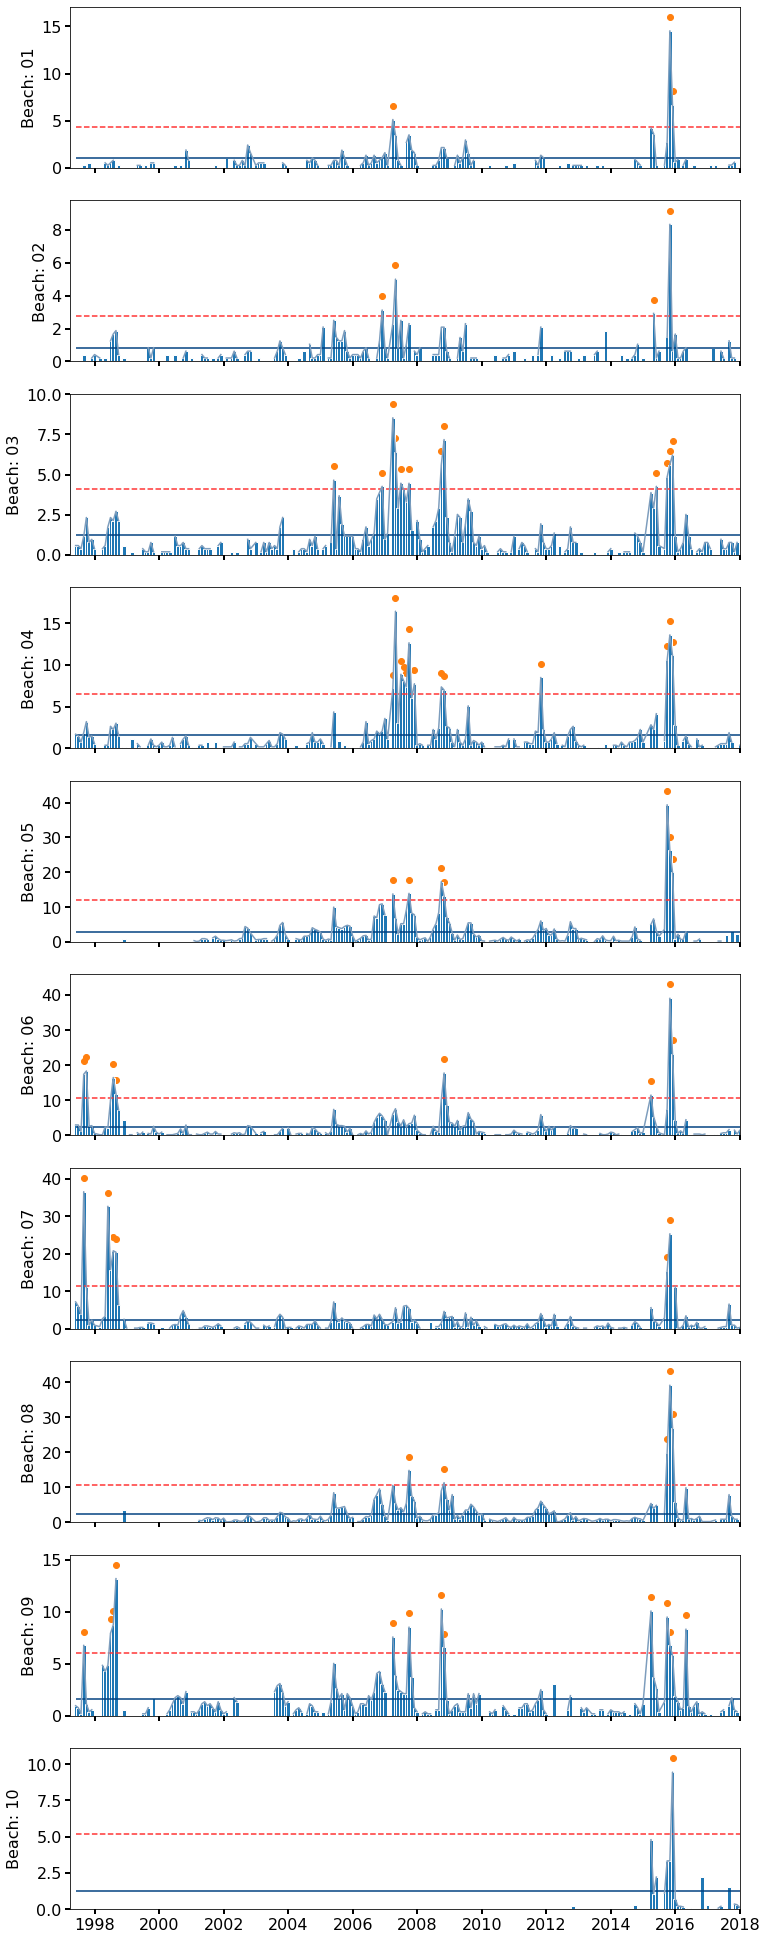

In [18]:
fig, ax = plt.subplots(len(beach_density.columns)-1,sharex=True)
fig.set_size_inches(12, (len(beach_density.columns)-1)*3.5)
for i, beach_id in enumerate(beach_ids):
    ax[i].bar(beach_density.index,beach_density[beach_id],width=41,edgecolor='w')
    ax[i].plot(beach_density.index,beach_density[beach_id],color="#7D9DBD")
    ax[i].set_ylabel("Beach: "+beach_id, size=16)
    beach_std = beach_density[beach_id].std()
    ax[i].hlines(beach_density[beach_id].mean(), beach_density.index.min(),beach_density.index.max(),"#004080")
    ax[i].hlines(beach_density[beach_id].mean()+2*beach_std, beach_density.index.min(),beach_density.index.max(),color='#ff3333',ls='dashed')
    events = beach_density[beach_id][beach_density[beach_id] > beach_density[beach_id].mean() + 2 * beach_density[beach_id].std()]
    ax[i].scatter(events.index,events + beach_density[beach_id].max()/10)
    ax[i].xaxis.set_tick_params(which='both',width=2,length=5)
    ax[i].yaxis.set_tick_params(which='both',width=2,length=5)
    ax[i].tick_params(axis='both', labelsize=16)
ax[i].set_xlim('19970401','20180101')
# plt.savefig('c_murre_beaches.png',dpi=220, bbox_inches='tight',pad_inches=.25)



### Common Murre deposition accross all years

__And calculate UME__

In [19]:
murres_filled_zeroes = beach_density.replace(to_replace=np.nan,value=0)
murre_deposition = murres_filled_zeroes.mean(axis=1)
murre_std = murre_deposition.std()
num_events = np.sum(murre_deposition > murre_deposition.mean()+2*murre_std)

In [20]:
num_events

12

Text(0.5, 0, 'Carcass per km')

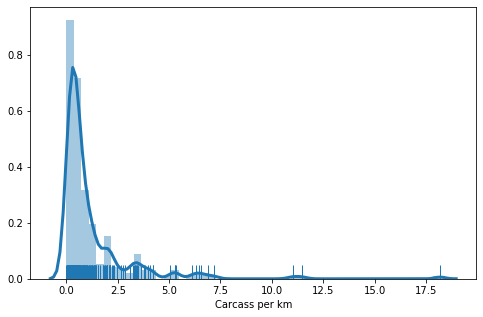

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.distplot(murre_deposition, hist = True, kde = True,rug=True,
             kde_kws = {'linewidth': 3},
             label = 'Common Murre',ax=ax)
ax.set_xlabel('Carcass per km')

Text(0.5, 1.0, 'Common Murre deposition rates - Core Beaches [1-10]')

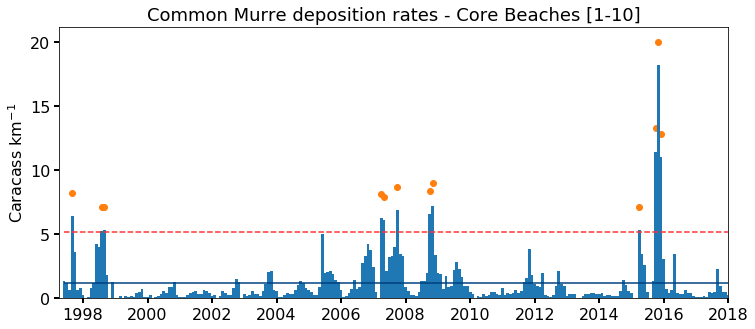

In [22]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12,5)
ax.bar(murre_deposition.index,murre_deposition,width=31)

ax.hlines(murre_deposition.mean(), murre_deposition.index.min(),murre_deposition.index.max(),color="#004080")
ax.hlines(murre_deposition.mean()+2*murre_std, murre_deposition.index.min(),murre_deposition.index.max(),color='#ff3333',ls='dashed')
events = murre_deposition[murre_deposition > murre_deposition.mean() + 2 * murre_deposition.std()]
ax.scatter(events.index,events + murre_deposition.max()/10)
ax.xaxis.set_tick_params(which='both',width=2,length=5)
ax.yaxis.set_tick_params(which='both',width=2,length=5)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel(r'Caracass $\rm{km^{-1}}$',size=16)
ax.set_xlim('19970401','20180101')
ax.set_title('Common Murre deposition rates - Core Beaches [1-10]', size=18)

# plt.savefig('c_murre_core.png',dpi=300, bbox_inches='tight',pad_inches=.25)

In [23]:
murres = core_birds.query("species_common_name == 'Common Murre'")
# 1. Count the number of surveys per beach per month
unique_surveys = core_birds.groupby([pd.Grouper(freq="M"), core_birds['beach_segment_code']])['unique_survey_identifier'].unique()
unique_surveys = unique_surveys.apply(lambda x: int(np.shape(x)[0]))
# 2. Count the number of carcasses per month per beach
carcass_count = murres.groupby([pd.Grouper(freq="M"), murres['beach_segment_code']])['carcass_present'].count()
carcass_count.head()
# 3. Divide by the number of surveys per month (average birds per month)
birds_per_month = carcass_count/unique_surveys
# 4. Divide by the length of the beach (birds/km/month)
beach_length = core_birds.groupby([pd.Grouper(freq="M"), core_birds['beach_segment_code']])['beach_length'].first()
birds_per_km = birds_per_month/beach_length
birds_per_km.head()
# 5 Calculate the density by beach
beach_ids = ['01', '02', '03', '04', '05', '06', '07', '08', '09','10']

for i, beach_id in enumerate(beach_ids):
    if i == 0:
        beach_density = pd.DataFrame({'birds_per_km':birds_per_km.xs(beach_id, level='beach_segment_code', drop_level=True)})
        beach_density['date'] = beach_density.index.tz_localize(None).to_pydatetime()
        beach_density.index= beach_density['date']
        beach_density.rename(columns={'birds_per_km':beach_id}, inplace=True)
    else:
        temp_beach = pd.DataFrame({'birds_per_km':birds_per_km.xs(beach_id, level='beach_segment_code', drop_level=True)})
        temp_beach['date'] = temp_beach.index.tz_localize(None).to_pydatetime()
        temp_beach.index= temp_beach['date']
        beach_density[beach_id] = temp_beach['birds_per_km']




murres_filled_zeroes = beach_density.replace(to_replace=np.nan,value=0)
murre_deposition = murres_filled_zeroes.mean(axis=1)
murre_std = murre_deposition.std()
num_events = np.sum(murre_deposition > murre_deposition.mean()+2*murre_std)